# **FINAL PROJECT: Rock-Paper-Scissors Classifier**

Ahmad Ridho (ahmdrdo@gmail.com)

DTS Reg.No: 0182180211-3

In [1]:
import os, zipfile, shutil
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt, image as mpimg
from google.colab import files
from keras.preprocessing import image

%matplotlib inline

## Downloading and extracting dataset

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-28 09:12:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.15MB/s    in 37s     

2021-06-28 09:13:34 (8.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Dataset unzip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

## Spliting dataset into training and validation set

In [4]:
# Define samples path
parent_dir = '/tmp/rockpaperscissors'

rock_dir = os.path.join(parent_dir, 'rock')
paper_dir = os.path.join(parent_dir, 'paper')
scissors_dir = os.path.join(parent_dir, 'scissors')
train_dir = os.path.join(parent_dir, 'train')
val_dir = os.path.join(parent_dir, 'val')

dset = [train_dir, val_dir]
for dir in dset:
  if os.path.exists(dir):
    shutil.rmtree(dir)
  os.mkdir(dir)

In [5]:
rock_train_dir = os.path.join(train_dir, 'rock')
paper_train_dir = os.path.join(train_dir, 'paper')
scissors_train_dir = os.path.join(train_dir, 'scissors')

rock_val_dir = os.path.join(val_dir, 'rock')
paper_val_dir = os.path.join(val_dir, 'paper')
scissors_val_dir = os.path.join(val_dir, 'scissors')
data_dir = [rock_train_dir, rock_val_dir, paper_train_dir, paper_val_dir, scissors_train_dir, scissors_val_dir]
for dir in data_dir:
  if os.path.exists(dir):
    shutil.rmtree(dir)
  os.mkdir(dir)

In [6]:
# Split dataset (validation data = 40% of total dataset)
rock_train, rock_val = train_test_split(os.listdir(rock_dir), test_size=0.4)
paper_train, paper_val = train_test_split(os.listdir(paper_dir), test_size=0.4)
scissors_train, scissors_val = train_test_split(os.listdir(scissors_dir), test_size=0.4)

# Function to copy the selected items into training/validation directory
def copy_data(data_set, src, dst):      # data_set = Splited dataset --> train/val data (type: list)
  for item in data_set:                 # src , dst = source and destination directory
    shutil.copy(os.path.join(src, str(item)), os.path.join(dst, str(item)))

In [7]:
# Copy the data into respective directories
copy_data(rock_train, rock_dir, rock_train_dir)
copy_data(rock_val, rock_dir, rock_val_dir)
copy_data(paper_train, paper_dir, paper_train_dir)
copy_data(paper_val, paper_dir, paper_val_dir)
copy_data(scissors_train, scissors_dir, scissors_train_dir)
copy_data(scissors_val, scissors_dir, scissors_val_dir)

In [8]:
sum_sample = len(os.listdir(rock_dir))+len(os.listdir(paper_dir))+len(os.listdir(scissors_dir))
print("Num of Rock:", len(os.listdir(rock_dir)))
print("Num of Paper:", len(os.listdir(paper_dir)))
print("Num of Scissors:", len(os.listdir(scissors_dir)))
print("\nTotal sample: %d" % sum_sample)
print("\nNum of Training data:", len(os.listdir(rock_train_dir))+len(os.listdir(paper_train_dir))+len(os.listdir(scissors_train_dir)))
print("Num of Validation data:", len(os.listdir(rock_val_dir))+len(os.listdir(paper_val_dir))+len(os.listdir(scissors_val_dir)))

Num of Rock: 726
Num of Paper: 712
Num of Scissors: 750

Total sample: 2188

Num of Training data: 1312
Num of Validation data: 876


## Images Augmentation

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,300),
    class_mode='categorical',
    interpolation='nearest'
)
val_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(200,300),
    class_mode='categorical',
    interpolation='nearest'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Create and train CNN model

In [11]:
# Model architecture
model = tf.keras.models.Sequential([
    # 1st convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # 2nd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 3rd convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # 4th convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into CNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 perceptrons hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')                                
])

In [12]:
# Model optimizer and loss function
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Callback, stop training when accuracy exeed 96%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAccuracy exceed 96%, model training is STOPPED.")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
mod_report = model.fit(
    train_generator,
    steps_per_epoch = 41, # steps = 1312 images / 32 batch_size
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 27, # steps = 876 images / 32 batch_size
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
41/41 - 33s - loss: 1.5236 - accuracy: 0.3430 - val_loss: 1.0470 - val_accuracy: 0.4062
Epoch 2/20
41/41 - 28s - loss: 1.3585 - accuracy: 0.4047 - val_loss: 1.3363 - val_accuracy: 0.3611
Epoch 3/20
41/41 - 28s - loss: 1.0571 - accuracy: 0.5534 - val_loss: 0.7958 - val_accuracy: 0.6319
Epoch 4/20
41/41 - 28s - loss: 0.8164 - accuracy: 0.6883 - val_loss: 0.6995 - val_accuracy: 0.6389
Epoch 5/20
41/41 - 28s - loss: 0.7058 - accuracy: 0.7264 - val_loss: 0.6178 - val_accuracy: 0.6863
Epoch 6/20
41/41 - 28s - loss: 0.4780 - accuracy: 0.8155 - val_loss: 0.2974 - val_accuracy: 0.8958
Epoch 7/20
41/41 - 28s - loss: 0.3774 - accuracy: 0.8704 - val_loss: 0.1656 - val_accuracy: 0.9433
Epoch 8/20
41/41 - 28s - loss: 0.2925 - accuracy: 0.9078 - val_loss: 0.1589 - val_accuracy: 0.9549
Epoch 9/20
41/41 - 28s - loss: 0.2836 - accuracy: 0.9078 - val_loss: 0.2329 - val_accuracy: 0.9109
Epoch 10/20
41/41 - 28s - loss: 0.2510 - accuracy: 0.9177 - val_loss: 0.1845 - val_accuracy: 0.9375
Epoch 11/

## Model evaluation by visualization

In [15]:
train_accu = np.array(mod_report.history['accuracy'])
train_loss = np.array(mod_report.history['loss'])
val_accu = np.array(mod_report.history['val_accuracy'])
val_loss = np.array(mod_report.history['val_loss'])
last_epoch = np.array(mod_report.epoch).max()+1

print("Maximum training accuracy:", round(train_accu.max(), 4))
print("Maximum validation accuracy:", round(val_accu.max(), 4))

Maximum training accuracy: 0.9619
Maximum validation accuracy: 0.9711


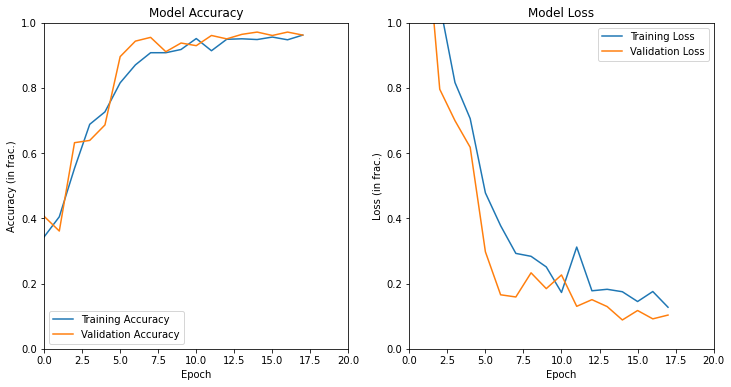

In [16]:
plt.figure(figsize=(12.0,6.0))
# Model accuracy
plt.subplot(1,2,1)
plt.plot(train_accu, label='Training Accuracy')
plt.plot(val_accu, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.xlim(0,20)
plt.ylabel('Accuracy (in frac.)')
plt.ylim(0.0,1.0)
plt.legend(loc='best')

# Model loss
plt.subplot(1,2,2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.xlim(0,20)
plt.ylabel('Loss (in frac.)')
plt.ylim(0.0,1.0)
plt.legend(loc='best')

plt.show()

## Upload form

Saving 1fKclJk4eBWOQSR1.png to 1fKclJk4eBWOQSR1.png
1fKclJk4eBWOQSR1.png
Paper


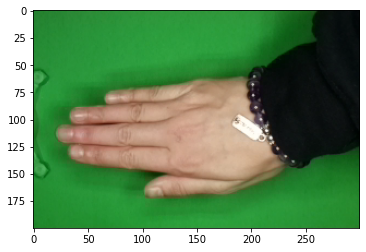

In [17]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('Scissors')